NDVI (Normalized Difference Vegetation Index) is a widely used metric in remote sensing and vegetation studies due to its significance in assessing vegetation health, density, and dynamics. Here are some key points highlighting the significance of NDVI:

1. Quantifying Vegetation Greenness: NDVI provides a quantitative measure of the greenness or vigor of vegetation cover in an area. It is sensitive to changes in chlorophyll content, leaf area index, and canopy structure, making it a useful indicator of vegetation health.

2. Monitoring Vegetation Dynamics: NDVI can track changes in vegetation over time, allowing researchers to monitor vegetation dynamics such as seasonal variations, vegetation growth, and phenological transitions (e.g., leaf emergence, senescence).

3. Assessing Land Cover and Land Use: NDVI can be used to classify land cover types and assess land use patterns. By analyzing NDVI values across different land cover classes, researchers can identify vegetation types, land degradation, and land management practices.

4. Environmental Monitoring: NDVI is employed in environmental monitoring to assess the impact of factors such as climate change, land use change, deforestation, and desertification on vegetation ecosystems. It helps in understanding ecosystem resilience and vulnerability to environmental stressors.

5. Predicting Crop Yield and Health: NDVI is utilized in agriculture to predict crop yield, monitor crop health, and optimize agricultural practices. By analyzing NDVI patterns within agricultural fields, farmers and agronomists can identify areas of stress, nutrient deficiencies, or water scarcity.

6. Biodiversity Conservation: NDVI is used in biodiversity conservation efforts to assess habitat quality, identify habitat fragmentation, and monitor changes in biodiversity hotspots. It helps conservationists prioritize areas for protection and restoration based on vegetation condition.

7. Water Resource Management: NDVI can aid in water resource management by indicating vegetation water stress and detecting changes in vegetation cover related to water availability. It is employed in drought monitoring, watershed management, and assessing ecosystem services related to water regulation.

8. Urban Planning and Green Infrastructure: NDVI is applied in urban planning to evaluate urban green spaces, assess urban heat island effects, and prioritize green infrastructure development. It helps cities optimize green space distribution and enhance urban resilience to climate change.

Overall, NDVI serves as a valuable tool for understanding the state of vegetation ecosystems, informing land management decisions, and supporting sustainable development initiatives across various sectors including agriculture, forestry, ecology, and environmental management.

In [1]:
!pip install earthpy rasterio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 42.4 MB/s eta 0:00:00


In [2]:
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt
import numpy as np
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

In [3]:
ndvi_images_paths = ['/content/drive/MyDrive/Forestation_dataset/2019-02-28-00_00_2019-02-28-23_59_Sentinel-2_L2A_NDVI.tiff',
                     '/content/drive/MyDrive/Forestation_dataset/2020-02-13-00_00_2020-02-13-23_59_Sentinel-2_L2A_NDVI.tiff',
                     '/content/drive/MyDrive/Forestation_dataset/2021-02-07-00_00_2021-02-07-23_59_Sentinel-2_L2A_NDVI.tiff',
                     '/content/drive/MyDrive/Forestation_dataset/2022-02-07-00_00_2022-02-07-23_59_Sentinel-2_L2A_NDVI.tiff',
                     '/content/drive/MyDrive/Forestation_dataset/2023-02-07-00_00_2023-02-07-23_59_Sentinel-2_L2A_NDVI.tiff',
                     '/content/drive/MyDrive/Forestation_dataset/2024-02-07-00_00_2024-02-07-23_59_Sentinel-2_L2A_NDVI.tiff']

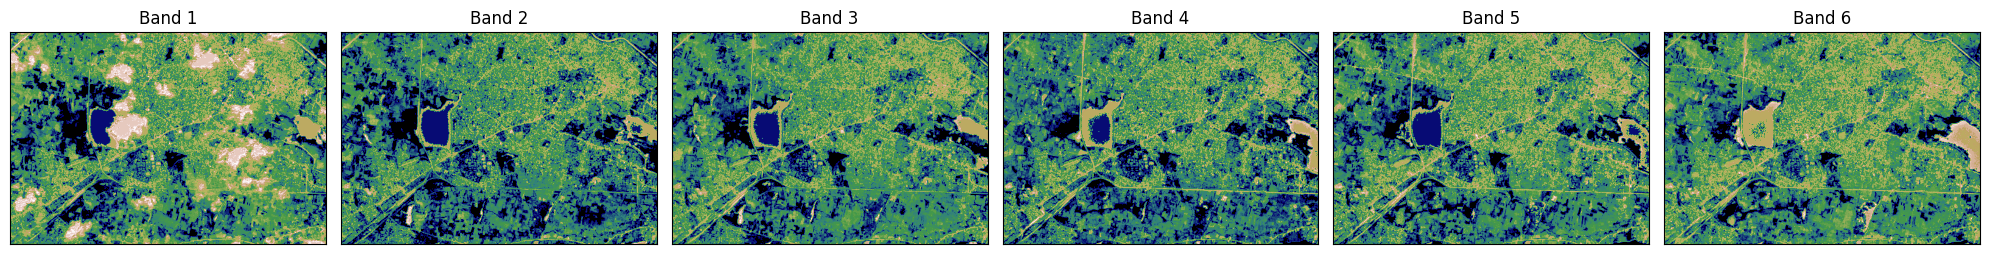

In [9]:
ndvi_images = []
for i in ndvi_images_paths:
    with rasterio.open(i, 'r') as f:
        ndvi_images.append(f.read(1))
arr_st = np.stack(ndvi_images)
ep.plot_bands(arr_st, cmap = 'gist_earth', figsize = (20, 12), cols = 6, cbar = False)
plt.show()

In [6]:
ndvi_images[0].shape

(348, 519)

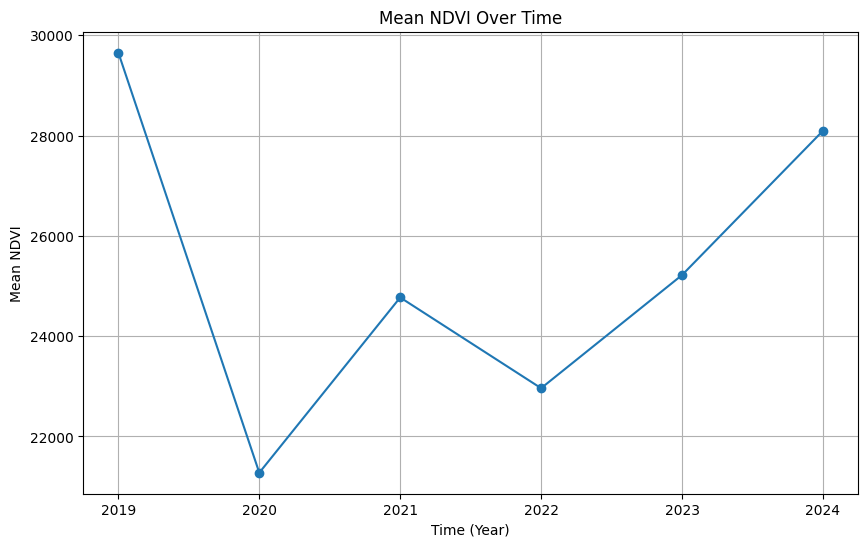

In [10]:
mean_ndvi_values = [np.mean(ndvi) for ndvi in ndvi_images]

plt.figure(figsize=(10, 6))
plt.plot(mean_ndvi_values, marker='o')
plt.title('Mean NDVI Over Time')
plt.xlabel('Time (Year)')
plt.ylabel('Mean NDVI')
plt.xticks(np.arange(len(ndvi_images)), range(2019, 2025))
plt.grid(True)
plt.show()

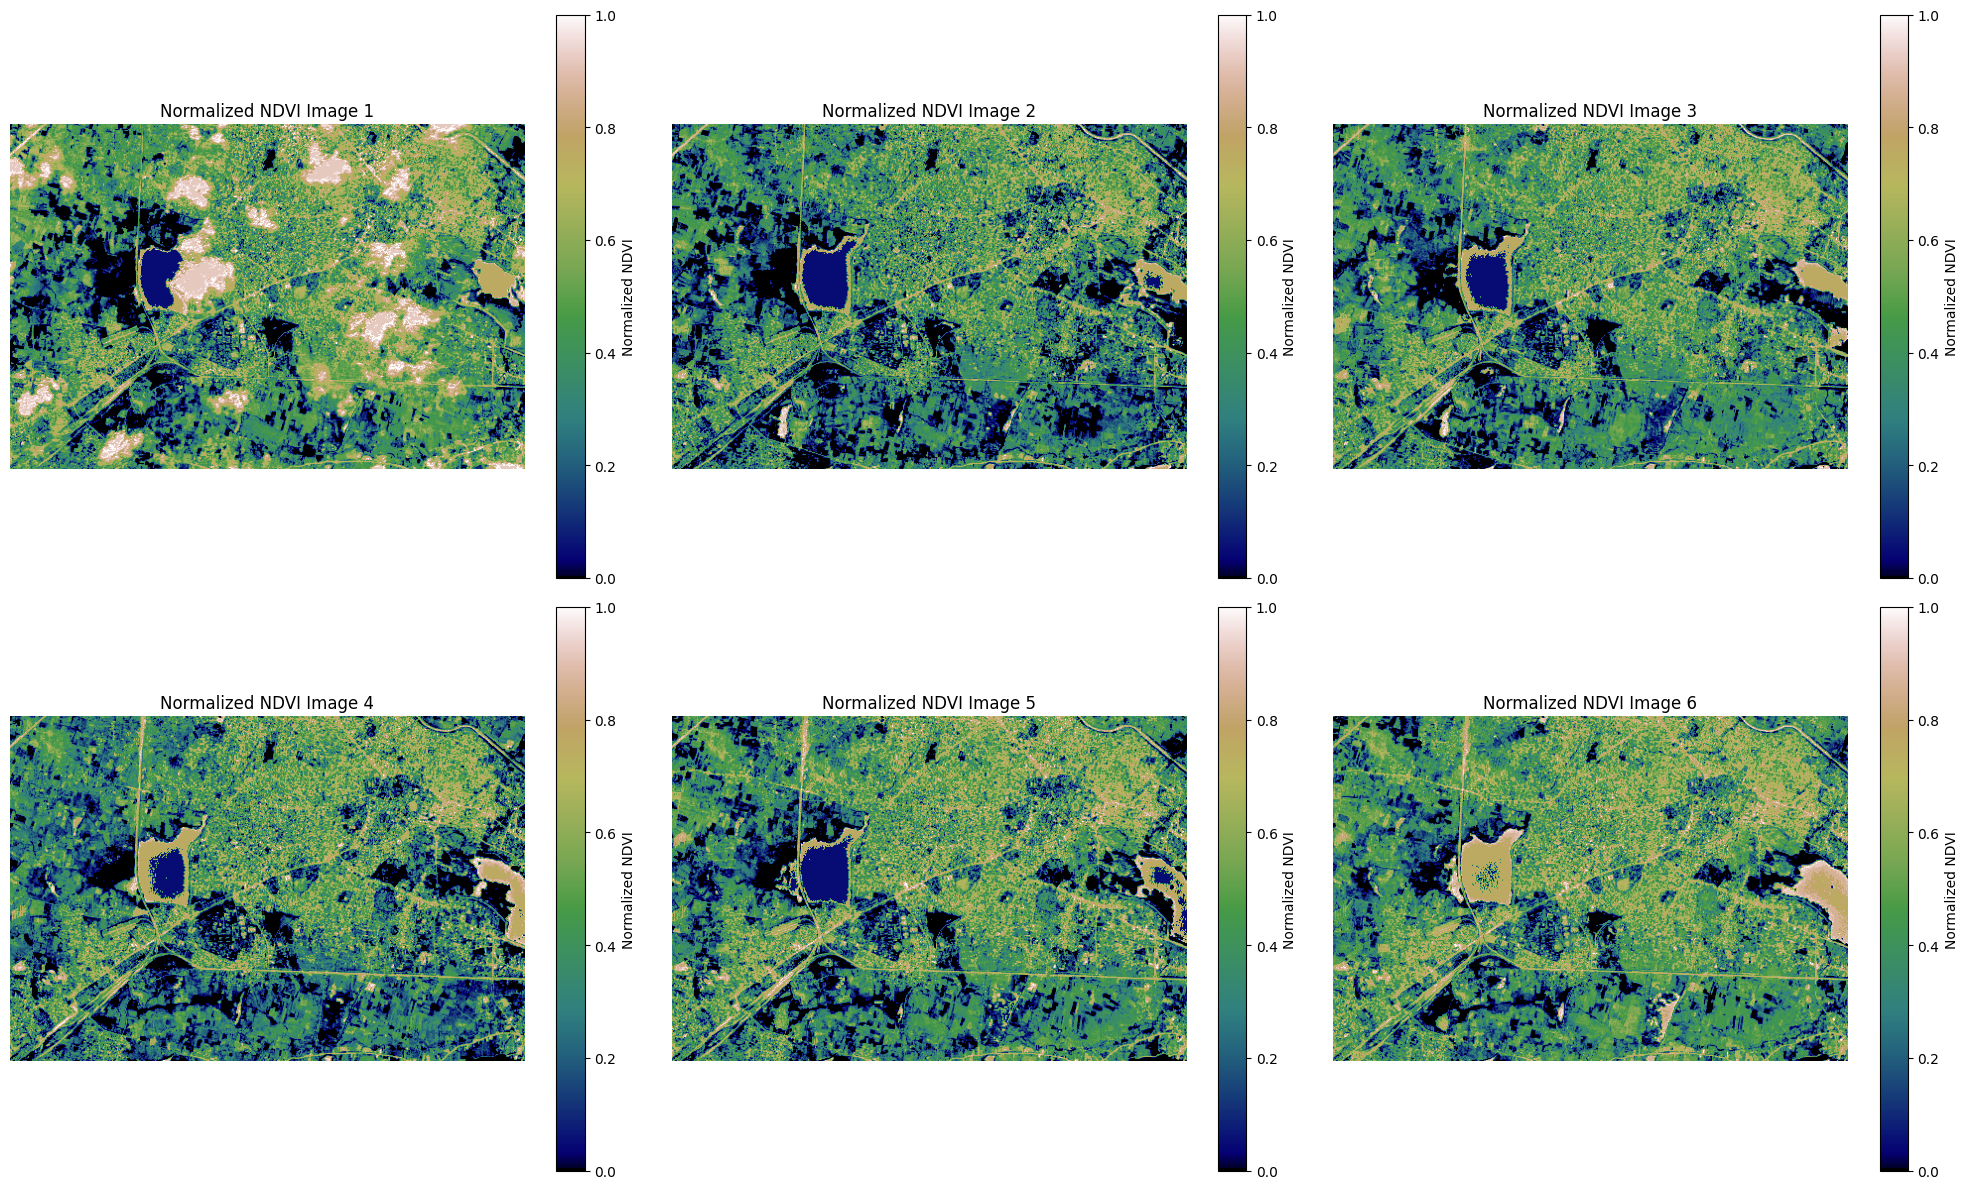

In [13]:

normalized_ndvi_images = []


def normalize_ndvi(ndvi):
    min_val = np.min(ndvi)
    max_val = np.max(ndvi)
    normalized_ndvi = (ndvi - min_val) / (max_val - min_val)
    return normalized_ndvi


for image_path in ndvi_images_paths:
    with rasterio.open(image_path) as src:
        ndvi = src.read(1, masked=True)  # Read NDVI band and mask nodata values
        normalized_ndvi = normalize_ndvi(ndvi)
        normalized_ndvi_images.append(normalized_ndvi)

plt.figure(figsize=(20, 12))
for i, ndvi in enumerate(normalized_ndvi_images, start=1):
    plt.subplot(2, 3, i)
    plt.imshow(ndvi, cmap='gist_earth')
    plt.colorbar(label='Normalized NDVI')
    plt.title(f'Normalized NDVI Image {i}')
    plt.axis('off')

plt.tight_layout()
plt.show()


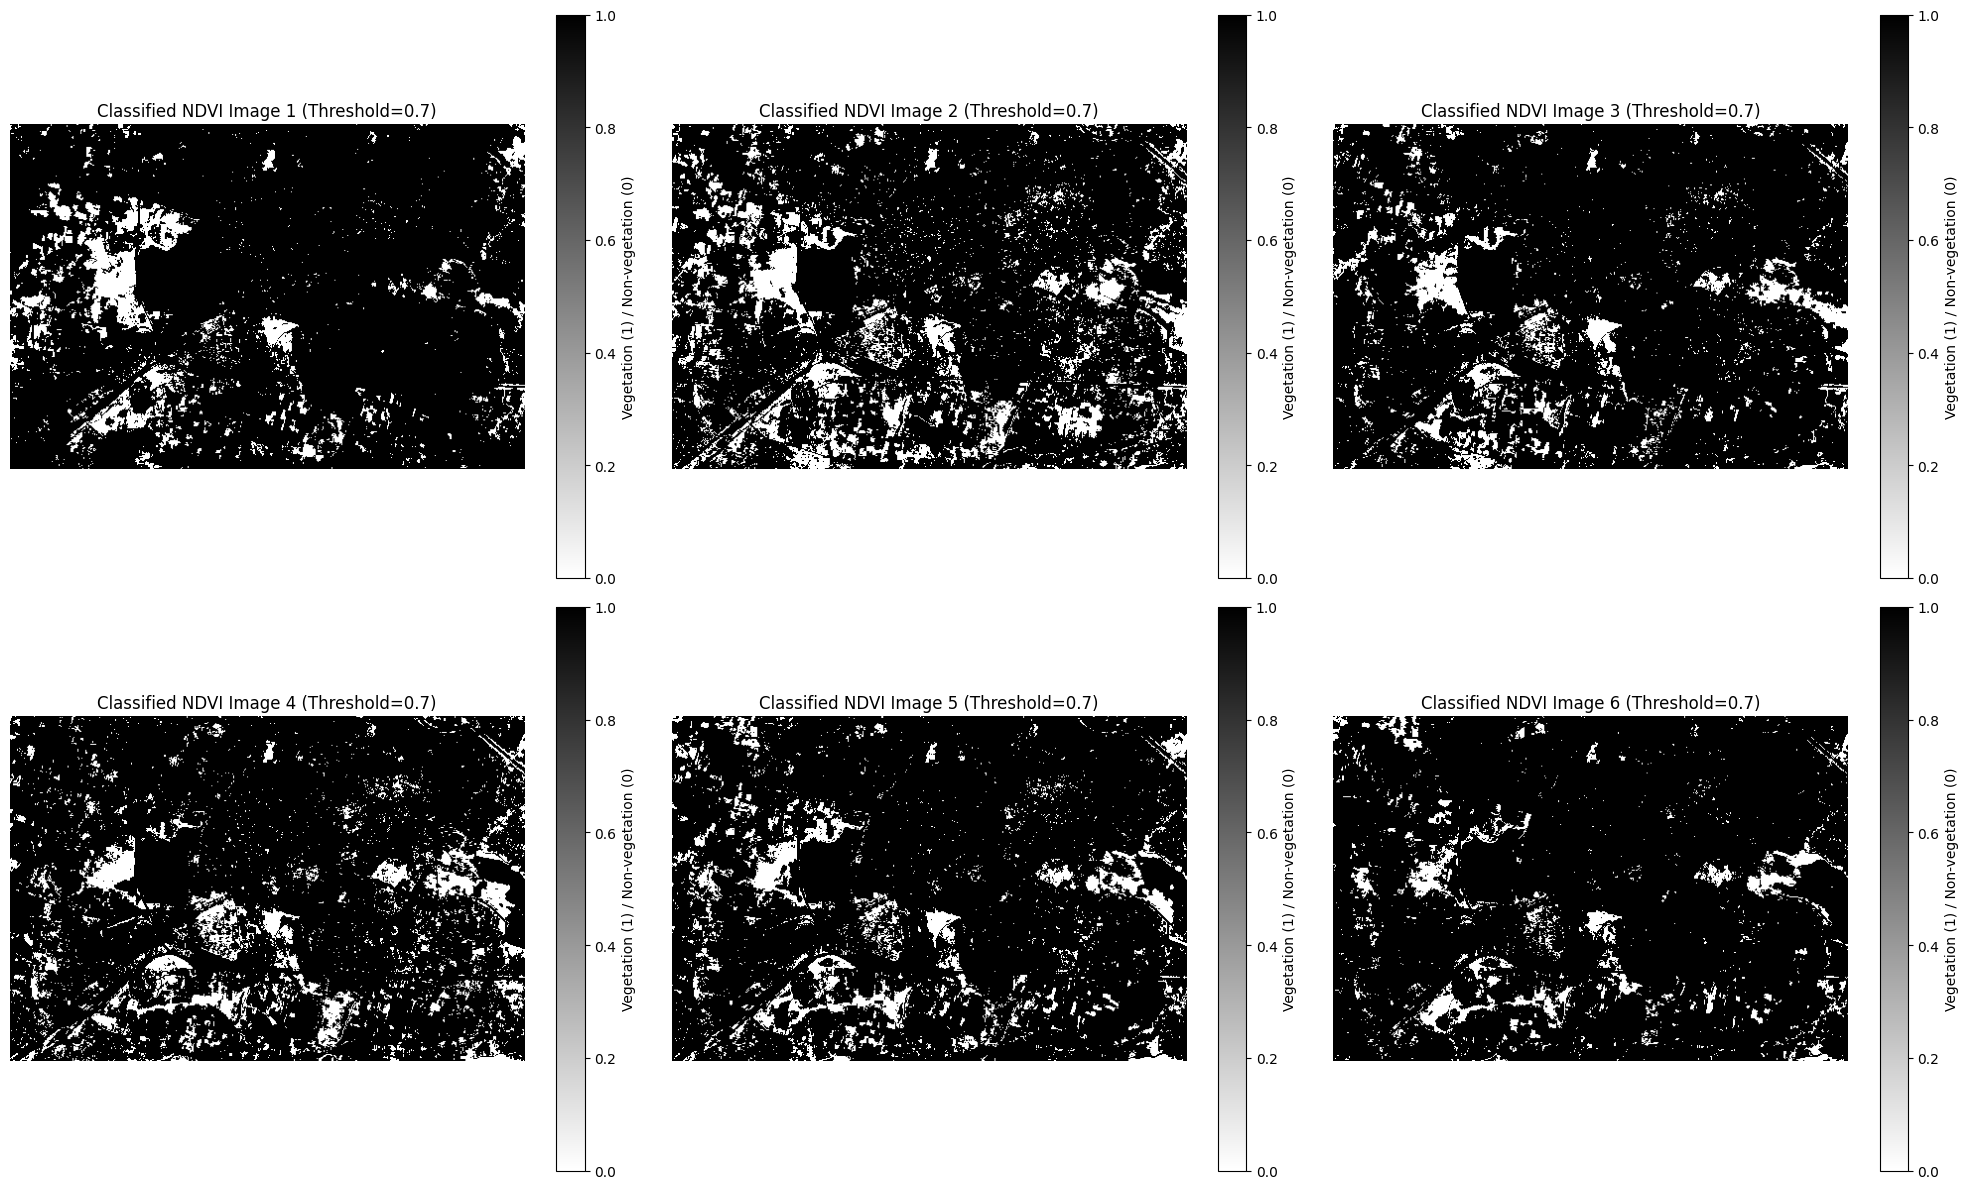

In [15]:
threshold = 0.7

classified_ndvi_images = []

def classify_ndvi(ndvi, threshold):
    classified_ndvi = np.where(ndvi >= threshold, 1, 0)
    return classified_ndvi

for image_path in ndvi_images_paths:
    with rasterio.open(image_path) as src:
        ndvi = src.read(1, masked=True)
        classified_ndvi = classify_ndvi(ndvi, threshold)
        classified_ndvi_images.append(classified_ndvi)

plt.figure(figsize=(20, 12))
for i, classified_ndvi in enumerate(classified_ndvi_images, start=1):
    plt.subplot(2, 3, i)
    plt.imshow(classified_ndvi, cmap='binary')
    plt.colorbar(label='Vegetation (1) / Non-vegetation (0)')
    plt.title(f'Classified NDVI Image {i} (Threshold={threshold})')
    plt.axis('off')

plt.tight_layout()
plt.show()


In [18]:
vegetation_areas = []
def calculate_vegetation_area(classified_ndvi):
    vegetation_area = np.sum(classified_ndvi == 1)
    vegetation_area_sqm = vegetation_area * 519 * 348
    return vegetation_area_sqm


for classified_ndvi in classified_ndvi_images:
    vegetation_area_sqm = calculate_vegetation_area(classified_ndvi)
    vegetation_areas.append(vegetation_area_sqm)

for i, area in enumerate(vegetation_areas, start=1):
    print(f"Area of vegetation in image {2018 + i}: {area/1000000} square kilometers")


Area of vegetation in image 2019: 29367.872424 square kilometers
Area of vegetation in image 2020: 26972.054244 square kilometers
Area of vegetation in image 2021: 29208.392028 square kilometers
Area of vegetation in image 2022: 28319.600376 square kilometers
Area of vegetation in image 2023: 28846.987416 square kilometers
Area of vegetation in image 2024: 30118.85712 square kilometers
